# Value Prediction Problem with TD(0)

<img src="random_walk.PNG" width=700 height=400 algin="left">

In [1]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np
import copy

In [2]:
def get_reward(state):
    if state == 'rterm':
        return 1.
    else:
        return 0.
    
def td_zero(no_episodes, states, gamma=0.99, alpha=0.1):
    V = np.zeros(len(states))
    E = np.zeros(len(states))
    for _ in range(no_episodes):
        s = len(states) // 2   # initialize start_state_index
        while states[s] not in terminals:
            action = -1 if random.randint(0, 1) else 1    # random policy
            next_s = s + action # next state index
            reward = get_reward(states[next_s])
            delta = alpha * (reward + gamma * V[next_s] - V[s])
            V[s] = V[s] + delta
            s = next_s
    return V

## 5-state random walk experiment (revisited)

In [3]:
states = list(range(5))
terminals = ('lterm', 'rterm')
states = [terminals[0]] + states + [terminals[1]]

In [4]:
V_tdzero = td_zero(100, states)

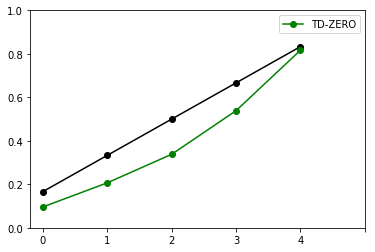

In [5]:
plt.plot([i/(len(states)-1) for i in range(1, len(states)-1)], 'ko-')
plt.plot([V_tdzero[x] for x in range(1, len(states)-1)], 'ko-', color='green', label='TD-ZERO')
plt.xticks(range(len(states)-1), states[1:-1])
plt.ylim([0,1])
plt.legend(loc='best')

## 19-state random walk experiment with 100 trials

In [6]:
states = list(range(19))
terminals = ('lterm', 'rterm')
states = [terminals[0]] + states + [terminals[1]]

In [7]:
V_tdzero = td_zero(100, states)

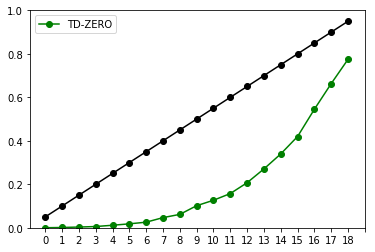

In [8]:
plt.plot([i/(len(states)-1) for i in range(1, len(states)-1)], 'ko-')
plt.plot([V_tdzero[x] for x in range(1, len(states)-1)], 'ko-', color='green', label='TD-ZERO')
plt.xticks(range(len(states)-1), states[1:-1])
plt.ylim([0,1])
plt.legend(loc='best')

## 19-state random walk experiment with 1000 trials

In [9]:
V_tdzero = td_zero(1000, states)

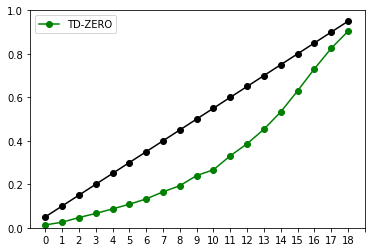

In [10]:
plt.plot([i/(len(states)-1) for i in range(1, len(states)-1)], 'ko-')
plt.plot([V_tdzero[x] for x in range(1, len(states)-1)], 'ko-', color='green', label='TD-ZERO')
plt.xticks(range(len(states)-1), states[1:-1])
plt.ylim([0,1])
plt.legend(loc='best')